In [2]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Define the URL of British Airways reviews on Skytrax
url = "https://www.airlinequality.com/airline-reviews/british-airways/"

# Headers to mimic a real browser
headers = {"User-Agent": "Mozilla/5.0"}

# Request the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract review content
reviews = soup.find_all("div", class_="text_content")

# Store reviews in a list
review_texts = [review.get_text(strip=True) for review in reviews]

# Save data to CSV
df = pd.DataFrame(review_texts, columns=["Review"])
# Create the 'data' directory if it doesn't exist
os.makedirs("data", exist_ok=True)
df.to_csv("data/ba_reviews.csv", index=False)

print("Reviews successfully scraped and saved!")

Reviews successfully scraped and saved!


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary libraries
nltk.download("stopwords")
nltk.download("punkt")
# Download the 'punkt_tab' data package
nltk.download('punkt_tab') # This line is added to download the missing data

def clean_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase & tokenize
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words("english")]
    return " ".join(tokens)

# Apply to dataset
df["Cleaned_Review"] = df["Review"].apply(clean_text)
df.to_csv("data/ba_reviews_cleaned.csv", index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

df["Sentiment_Score"] = df["Cleaned_Review"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["Sentiment"] = df["Sentiment_Score"].apply(lambda x: "Positive" if x > 0.05 else "Negative" if x < -0.05 else "Neutral")

# Save updated dataset
df.to_csv("data/ba_reviews_sentiment.csv", index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<ipython-input-8-91af180a1629>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Sentiment", data=df, palette="pastel", order=["Positive", "Neutral", "Negative"])


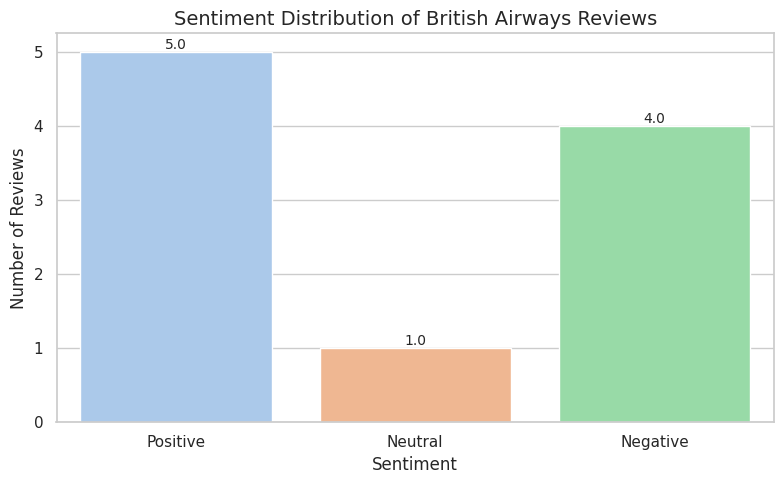

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Sentiment", data=df, palette="pastel", order=["Positive", "Neutral", "Negative"])
plt.title("Sentiment Distribution of British Airways Reviews", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


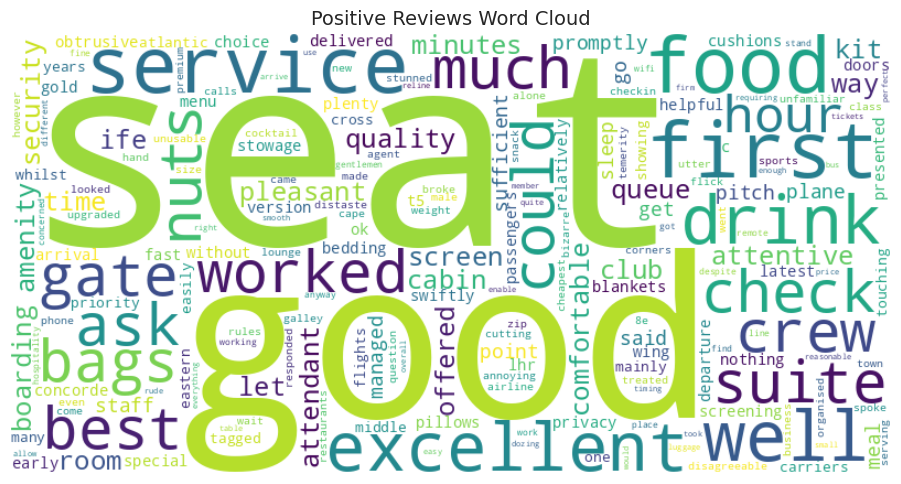

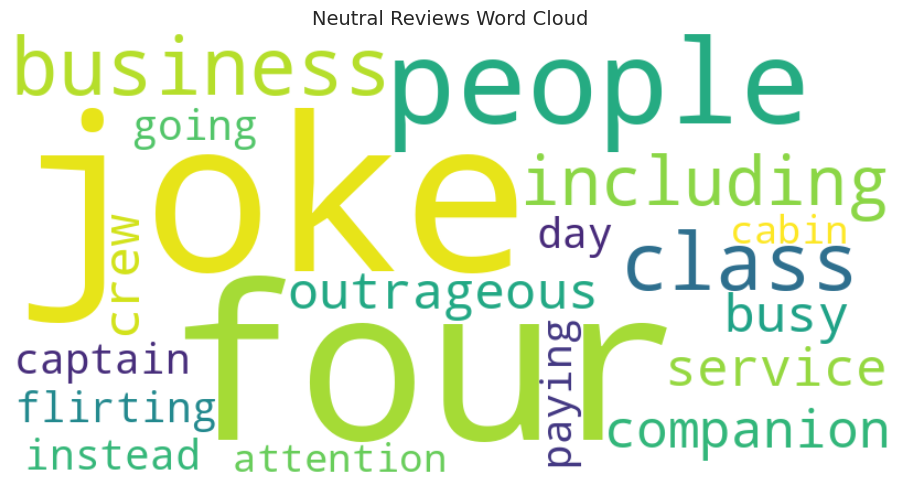

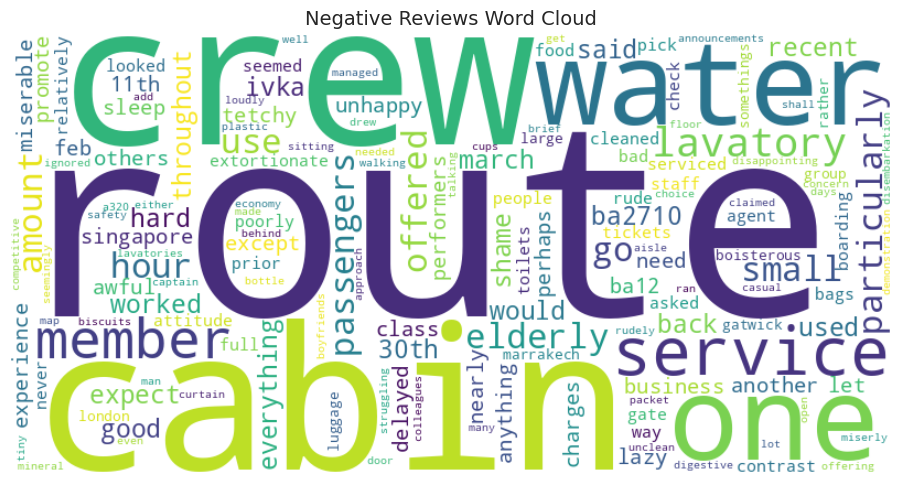

In [10]:
sentiments = ["Positive", "Neutral", "Negative"]

for sentiment in sentiments:
    text = " ".join(df[df["Sentiment"] == sentiment]["Cleaned_Review"])
    wc = WordCloud(width=800, height=400, background_color="white",
                   stopwords=custom_stopwords).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{sentiment} Reviews Word Cloud", fontsize=14)
    plt.tight_layout()
    plt.show()


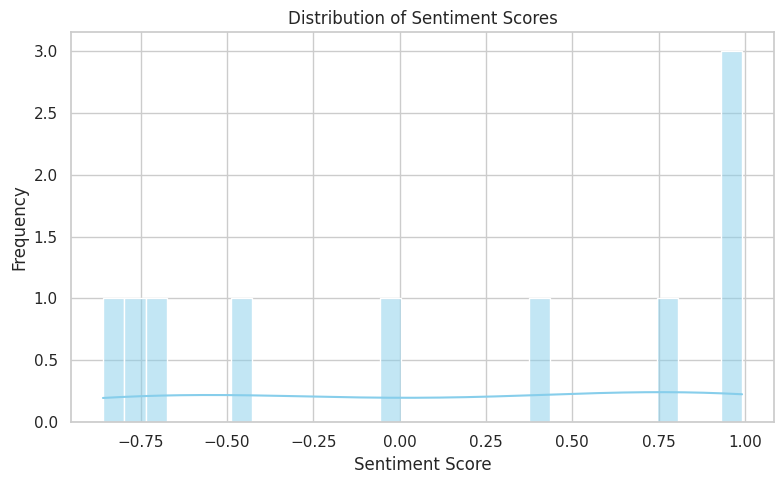

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment_Score"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


<ipython-input-12-7783312d7fee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sentiment", y="Sentiment_Score", data=df, palette="pastel", order=["Positive", "Neutral", "Negative"])


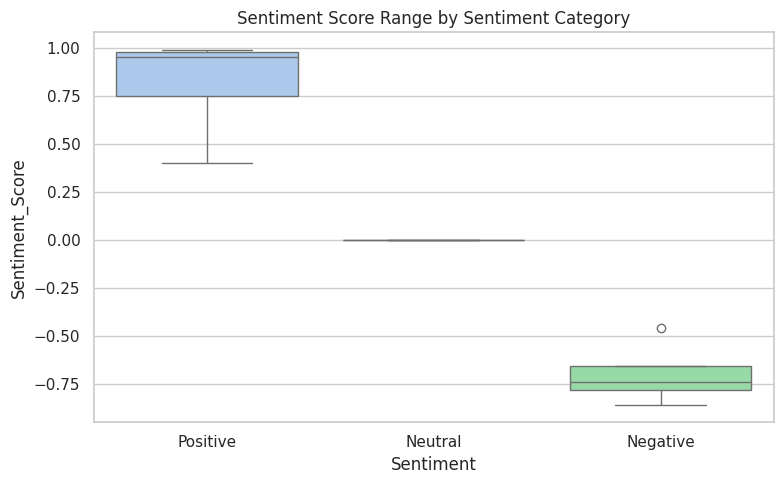

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Sentiment", y="Sentiment_Score", data=df, palette="pastel", order=["Positive", "Neutral", "Negative"])
plt.title("Sentiment Score Range by Sentiment Category")
plt.tight_layout()
plt.show()


In [14]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


2025-04-03 09:08:56.099 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 09:08:56.100 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 09:08:56.282 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-03 09:08:56.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 09:08:56.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 09:08:56.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 09:08:56.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

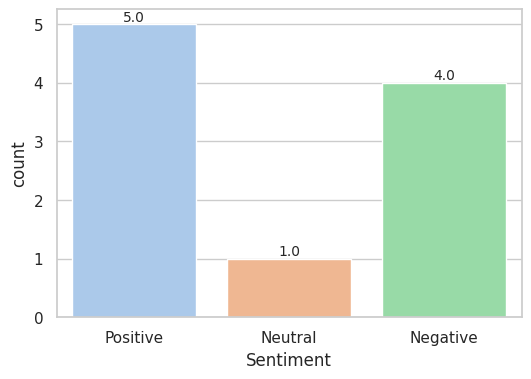

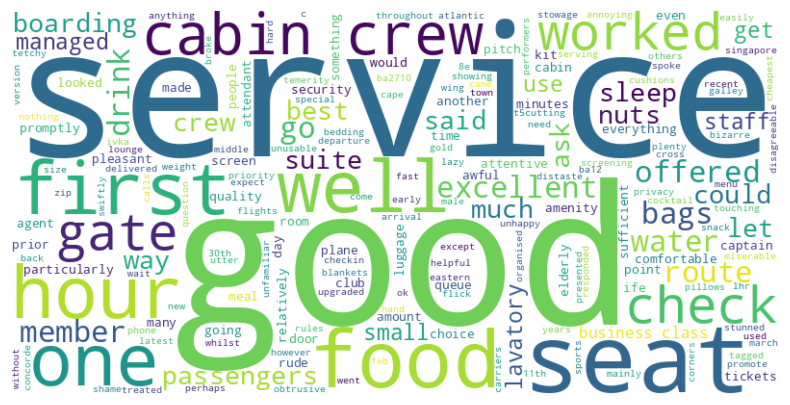

In [15]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Load your data
df = pd.read_csv("data/ba_reviews_sentiment.csv")

# Set page config
st.set_page_config(page_title="British Airways Reviews Dashboard", layout="wide")

# Sidebar
st.sidebar.title("Options")
selected_sentiment = st.sidebar.selectbox("Filter by Sentiment", options=["All", "Positive", "Neutral", "Negative"])

# Filter data
if selected_sentiment != "All":
    filtered_df = df[df["Sentiment"] == selected_sentiment]
else:
    filtered_df = df

# Main Title
st.title("✈️ British Airways Reviews Sentiment Dashboard")

# 1. Sentiment Distribution Chart
st.subheader("Sentiment Distribution")
fig1, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x="Sentiment", data=df, palette="pastel", order=["Positive", "Neutral", "Negative"], ax=ax)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
st.pyplot(fig1)

# 2. Word Cloud
st.subheader("Word Cloud")

# Prepare text
text = " ".join(filtered_df["Cleaned_Review"])
stop_words = set(stopwords.words("english")) | {"flight", "british", "airways", "ba"}
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text)

# Display
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.imshow(wordcloud, interpolation="bilinear")
ax2.axis("off")
st.pyplot(fig2)

# 3. Show Table
st.subheader("Reviews")
st.dataframe(filtered_df[["Review", "Sentiment", "Sentiment_Score"]], use_container_width=True)

# Optional: Text Search
search_term = st.text_input("🔍 Search Reviews")
if search_term:
    result_df = filtered_df[filtered_df["Review"].str.contains(search_term, case=False)]
    st.write(f"Found {len(result_df)} matching reviews:")
    st.dataframe(result_df[["Review", "Sentiment", "Sentiment_Score"]], use_container_width=True)


In [29]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M").astype(str)

# Count by sentiment and month
monthly_sentiment = df.groupby(["Month", "Sentiment"]).size().reset_index(name="Count")

fig = px.bar(monthly_sentiment, x="Sentiment", y="Count", color="Sentiment",
             animation_frame="Month", animation_group="Sentiment",
             title="Sentiment Over Time",
             color_discrete_map={"Positive": "green", "Neutral": "gray", "Negative": "red"})

fig.update_layout(template="plotly_white", xaxis={'categoryorder':'array', 'categoryarray':["Positive", "Neutral", "Negative"]})
fig.show()


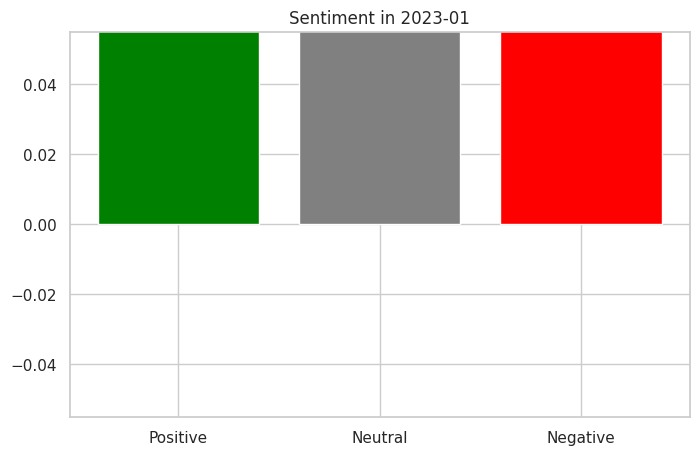

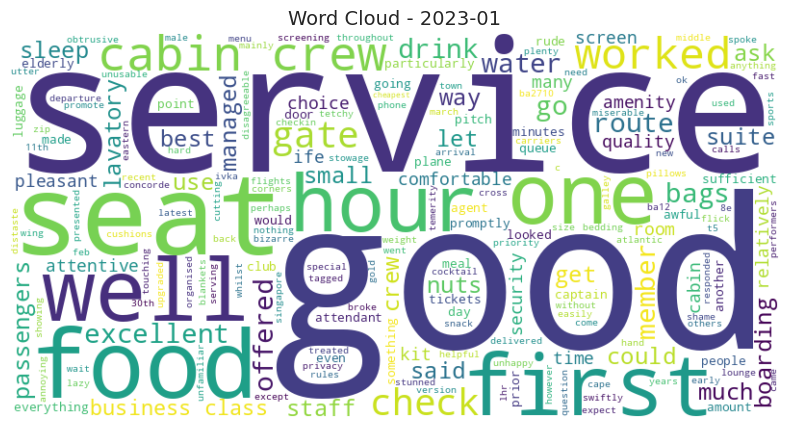

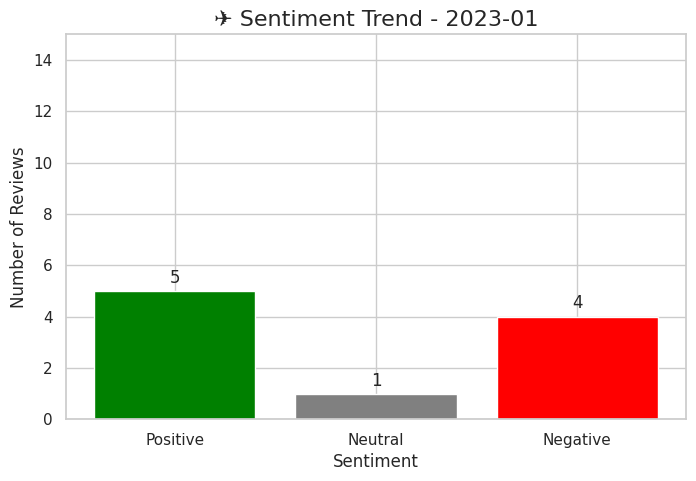

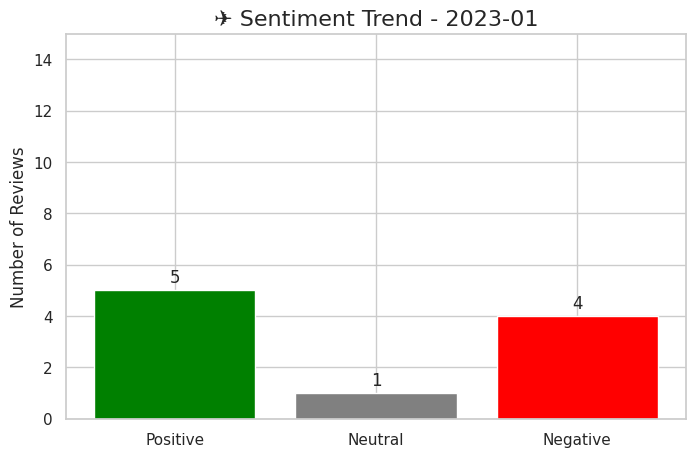

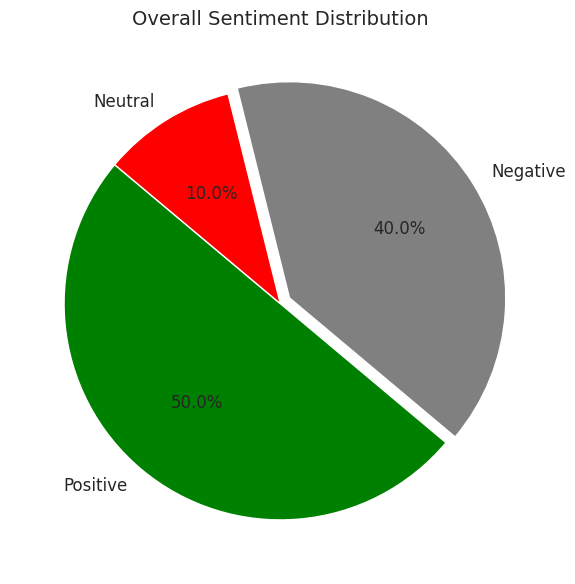

In [36]:
sentiment_counts = df["Sentiment"].value_counts()

colors = ["green", "gray", "red"]
explode = [0.05 if sentiment == "Negative" else 0 for sentiment in sentiment_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct="%1.1f%%", colors=colors, explode=explode,
        startangle=140, textprops={"fontsize": 12})
plt.title("Overall Sentiment Distribution", fontsize=14)
plt.tight_layout()
plt.show()


In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [40]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [41]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  Not Verified |  LHR T5 BA Gold Wing worked wel...
1  Not Verified |  Very good service on this rout...
2  ✅ Trip Verified |   Flight mainly let down by ...
3  ✅ Trip Verified |   Another awful experience b...
4  ✅ Trip Verified |   The service was rude, full...

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.



from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.



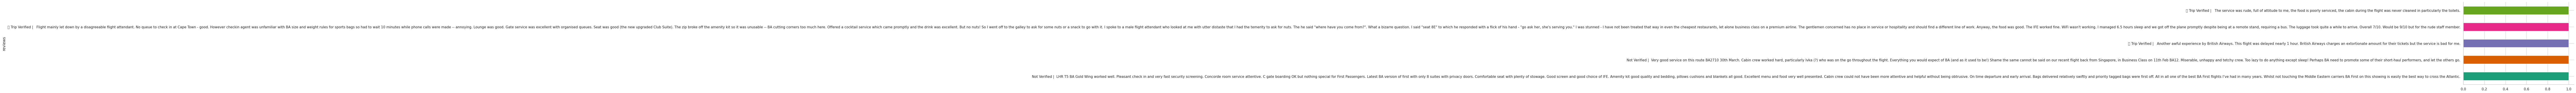

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


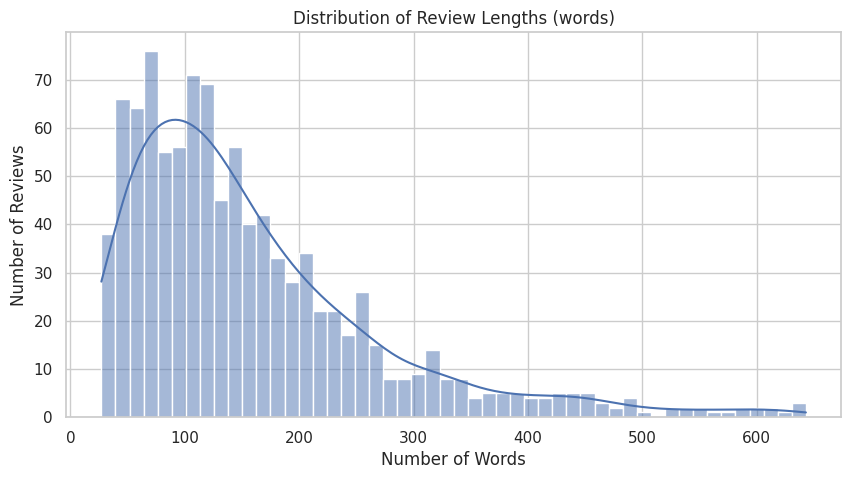

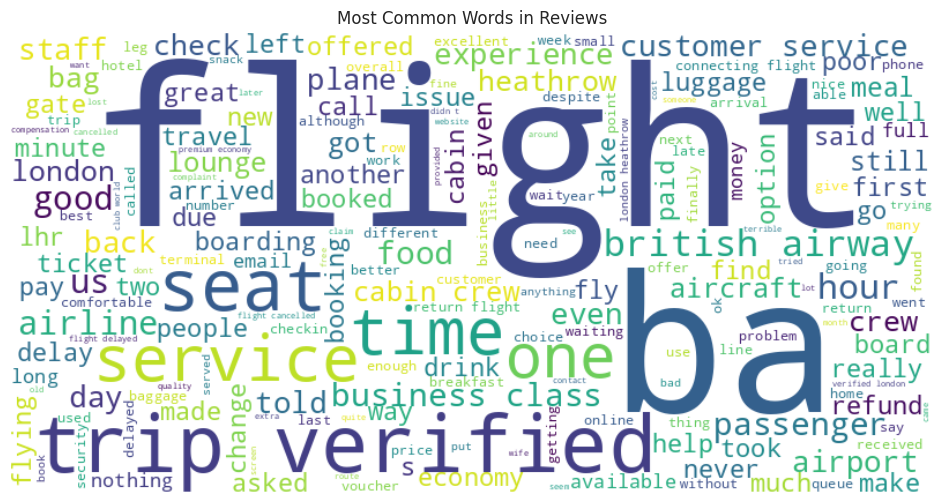

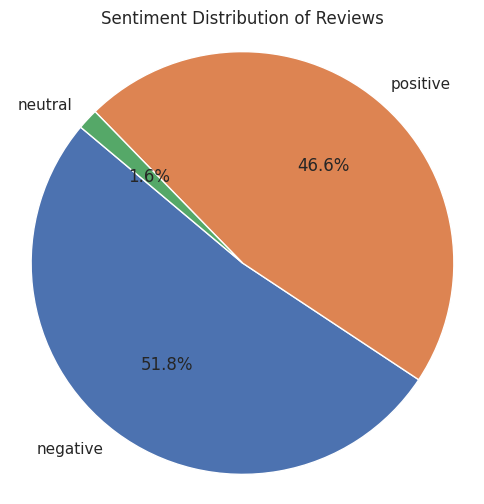

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.



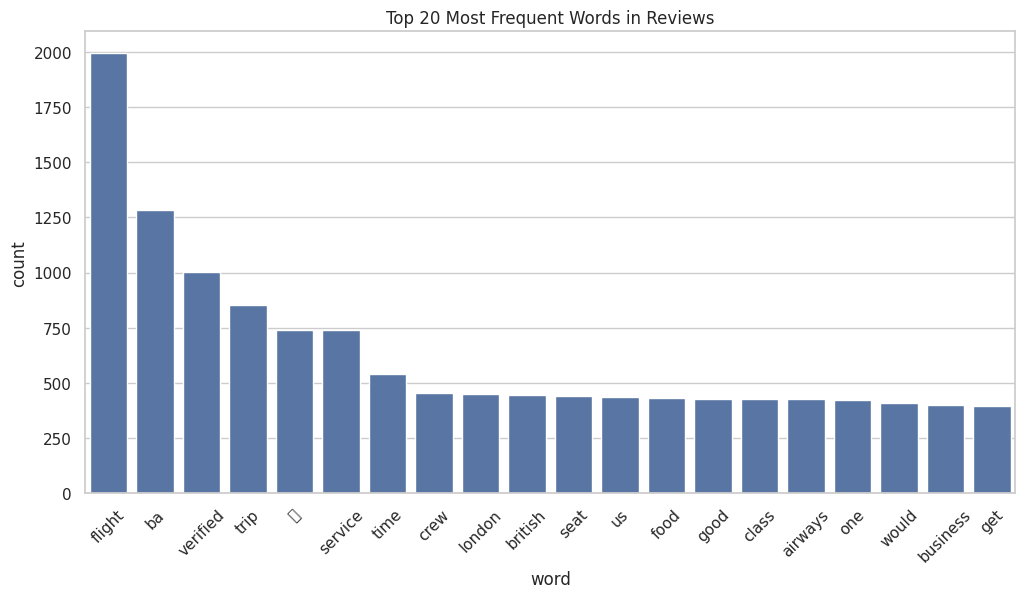

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import string

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Clean reviews
df['review_length'] = df['reviews'].apply(lambda x: len(x.split()))

# === 1. Review Length Distribution ===
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths (words)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

# === 2. Word Cloud ===
stop_words = set(stopwords.words('english'))
all_reviews = ' '.join(df['reviews']).lower()
all_reviews_clean = ''.join([char for char in all_reviews if char not in string.punctuation])
filtered_words = [word for word in all_reviews_clean.split() if word not in stop_words]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews")
plt.show()

# === 3. Sentiment Analysis ===
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Pie Chart of Sentiment Distribution
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution of Reviews")
plt.axis('equal')
plt.show()

# === 4. Top 20 Most Common Words ===
from collections import Counter
word_freq = Counter(filtered_words)
most_common = word_freq.most_common(20)
common_words_df = pd.DataFrame(most_common, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=common_words_df, x='word', y='count')
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xticks(rotation=45)
plt.show()


In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
dates = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract review content
    for review_block in soup.find_all("article", {"itemprop": "review"}):
        review_text = review_block.find("div", {"class": "text_content"}).get_text(strip=True)
        review_date = review_block.find("time").get_text(strip=True)
        reviews.append(review_text)
        dates.append(review_date)

df = pd.DataFrame({"review": reviews, "date": dates})

# Define a custom function to handle day suffixes (st, nd, rd, th) and incorrect month abbreviations
def custom_date_parser(date_str):
    # Remove suffixes from day
    date_str = date_str.replace("st", "").replace("nd", "").replace("rd", "").replace("th", "")

    # Fix incorrect month abbreviations (e.g., "Augu" to "August", "Sept" to "September")
    date_str = date_str.replace("Augu", "August").replace("Sept", "September")

    try:
        return pd.to_datetime(date_str, format="%d %B %Y")
    except ValueError:
        print(f"Could not parse date: {date_str}")  # Print dates that still cause errors
        return pd.NaT  # Return NaT (Not a Time) for unparsable dates


# Apply custom parser to convert to datetime objects
df["date"] = df["date"].apply(custom_date_parser)

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Could not parse date: 28 Septemberember 2024
Could not parse date: 25 Septemberember 2024
Could not parse date: 24 Septemberember 2024
Could not parse date: 22 Septemberember 2024
Could not parse date: 13 Septemberember 2024
Could not parse date: 13 Septemberember 2024
Could not parse date: 13 Septemberember 2024
Could not parse date: 11 Septemberember 2024
Could not parse date: 8 Septemberember 2024
Could not parse date: 6 Septemberember 2024
Could not parse date: 2 Septemberember 2024
Could not parse date: 1 Septemberember 2024
Could not parse date: 30 Septemberember 2023
Could not parse date: 30 Septemberember 2023
Could not parse date: 28 Septemberember 2023
Could not parse date: 28 Septemberember 2023
Could not parse date: 27 Septemberember 2023
Could not parse date: 23 Septemberember 2023
Could not parse date: 22 Septembe

In [49]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Add sentiment scores and label
df["sentiment_score"] = df["review"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment"] = df["sentiment_score"].apply(
    lambda score: "positive" if score > 0.05 else ("negative" if score < -0.05 else "neutral")
)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
df["month"] = df["date"].dt.to_period("M")

monthly_sentiment = df.groupby(["month", "sentiment"]).size().unstack(fill_value=0)

# Normalize by row total to get percentages
monthly_percent = monthly_sentiment.div(monthly_sentiment.sum(axis=1), axis=0) * 100
monthly_percent = monthly_percent.reset_index()


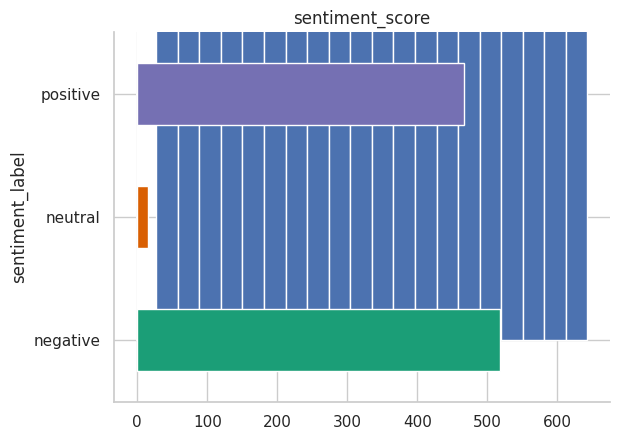

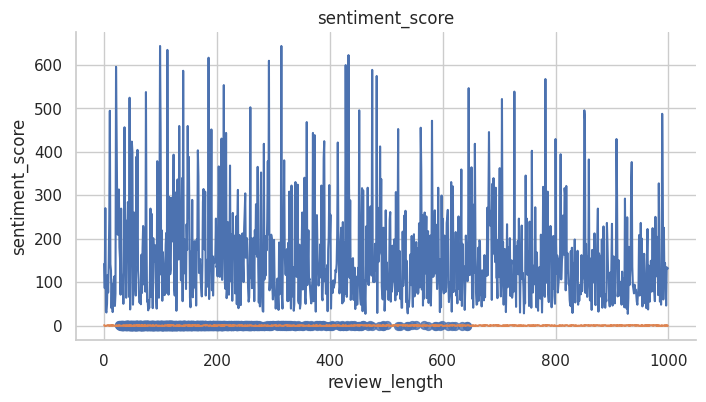

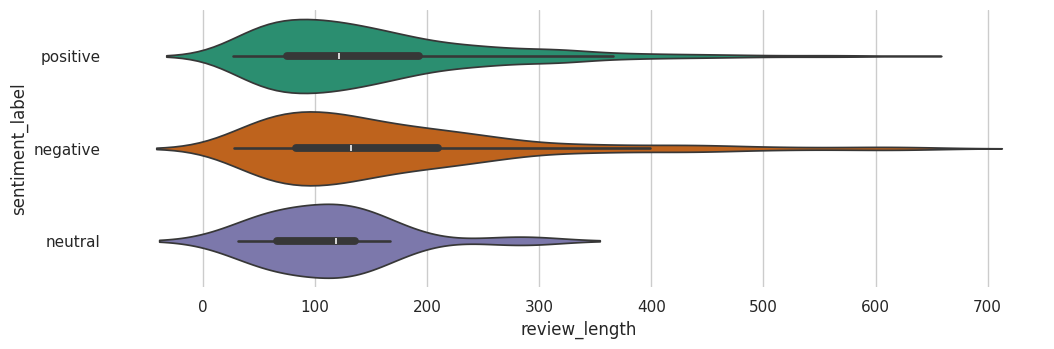

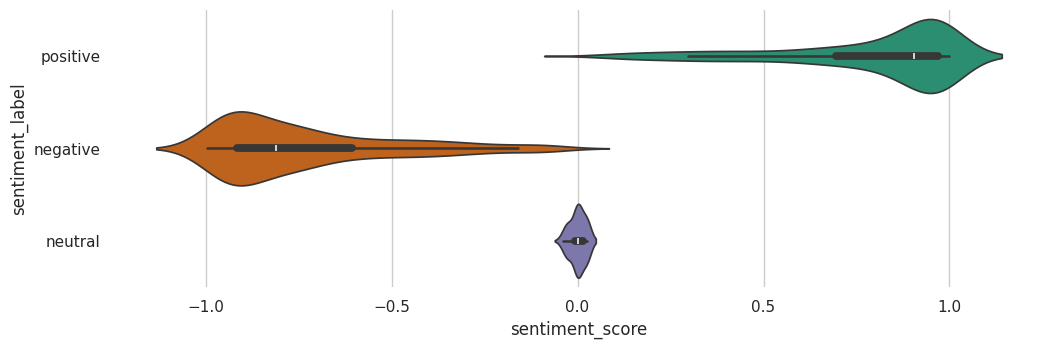

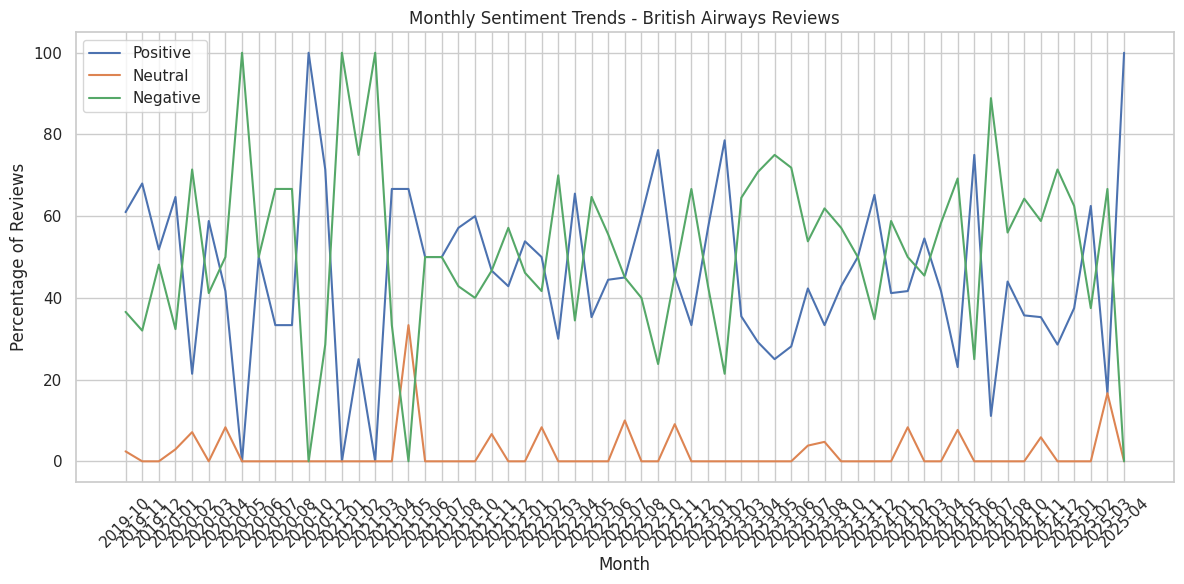

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for sentiment in ["positive", "neutral", "negative"]:
    plt.plot(monthly_percent["month"].astype(str), monthly_percent[sentiment], label=sentiment.capitalize())

plt.title("Monthly Sentiment Trends - British Airways Reviews")
plt.xlabel("Month")
plt.ylabel("Percentage of Reviews")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [52]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review
df["sentiment_score"] = df["review"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Label based on score thresholds
df["sentiment"] = df["sentiment_score"].apply(
    lambda score: "positive" if score > 0.05 else ("negative" if score < -0.05 else "neutral")
)

# Extract month as Period for grouping
df["month"] = df["date"].dt.to_period("M")

# Group by month and sentiment and count
monthly_sentiment_counts = df.groupby(["month", "sentiment"]).size().unstack(fill_value=0)

# Also normalize to get percentages (optional)
monthly_sentiment_percent = monthly_sentiment_counts.div(monthly_sentiment_counts.sum(axis=1), axis=0) * 100

# Display results
print("Monthly Sentiment Counts:")
print(monthly_sentiment_counts)

print("\nMonthly Sentiment Percentages:")
print(monthly_sentiment_percent)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Monthly Sentiment Counts:
sentiment  negative  neutral  positive
month                                 
2019-10          15        1        25
2019-11           8        0        17
2019-12          13        0        14
2020-01          11        1        22
2020-02          10        1         3
...             ...      ...       ...
2024-12           5        0         2
2025-01           5        0         3
2025-02           3        0         5
2025-03           4        1         1
2025-04           0        0         1

[61 rows x 3 columns]

Monthly Sentiment Percentages:
sentiment   negative    neutral    positive
month                                      
2019-10    36.585366   2.439024   60.975610
2019-11    32.000000   0.000000   68.000000
2019-12    48.148148   0.000000   51.851852
2020-01    32.352941   2.941176   64.705882
2020-02    71.428571   7.142857   21.428571
...              ...        ...         ...
2024-12    71.428571   0.000000   28.571429
2025-01    62.50

In [54]:
from graphviz import Digraph

# Filter months with at least one review
filtered = monthly_sentiment_percent[(monthly_sentiment_counts.sum(axis=1)) > 0].copy()

# Reset index to get 'month' column
filtered = filtered.reset_index()

# Initialize directed graph
dot = Digraph(comment='Monthly Sentiment Flow')
dot.attr(rankdir='LR', fontsize='12')

# Create labeled nodes
for i, row in filtered.iterrows():
    month_str = row['month'].strftime('%b %Y')  # e.g., Jan 2020
    label = f"{month_str}\\nNeg: {row['negative']:.1f}%\\nNeu: {row['neutral']:.1f}%\\nPos: {row['positive']:.1f}%"
    dot.node(f"{i}", label=label, shape='box', style='filled', fillcolor='lightyellow')

# Add directional edges between months
for i in range(len(filtered) - 1):
    dot.edge(f"{i}", f"{i+1}")


# Render the flowchart as PNG and save to current directory
output_path = dot.render("monthly_sentiment_flowchart", format='png', cleanup=True)

print(f"Flowchart saved at: {output_path}")


Flowchart saved at: monthly_sentiment_flowchart.png


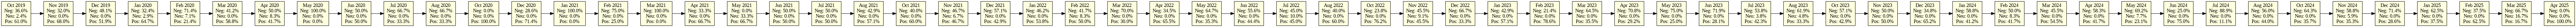

In [55]:
from IPython.display import Image
Image(filename='monthly_sentiment_flowchart.png')


In [56]:
from graphviz import Digraph

dot = Digraph(comment="Chunked Timeline")
dot.attr(rankdir='LR', fontsize='10', nodesep='0.5')

last_node = None

for i, row in filtered.iterrows():
    month_str = row['month'].strftime('%b %Y')
    node_id = f"{i}"
    label = f"{month_str}\\nNeg: {row['negative']:.1f}%\\nNeu: {row['neutral']:.1f}%\\nPos: {row['positive']:.1f}%"

    dot.node(node_id, label=label, shape='box', style='filled', fillcolor='lightyellow')

    if last_node:
        dot.edge(last_node, node_id)
    last_node = node_id

# Render to PNG
dot.render("chunked_sentiment_flowchart", format='png', cleanup=True)
dot.view()


'chunked_sentiment_flowchart.pdf'

In [57]:
dot.render("monthly_sentiment_flowchart", format='svg', cleanup=True)
from IPython.display import SVG
display(SVG(filename="monthly_sentiment_flowchart.svg"))


In [58]:
# Assume this is your actual dataframe from earlier
df = monthly_sentiment_percent.reset_index().copy()
df["month_str"] = df["month"].dt.strftime("%b %Y")

# Mermaid node and edge builder
nodes = []
edges = []

def node_id(i):
    # Use a readable ID like A, B, ..., Z, A1, B1, ...
    return chr(65 + (i % 26)) + (str(i // 26) if i >= 26 else '')

for i, row in df.iterrows():
    nid = node_id(i)
    label = f'{row["month_str"]}\\nNeg: {row["negative"]:.1f}% Neu: {row["neutral"]:.1f}% Pos: {row["positive"]:.1f}%'
    nodes.append(f'{nid}["{label}"]')
    if i > 0:
        prev_id = node_id(i - 1)
        edges.append(f'{prev_id} --> {nid}')

# Assemble Mermaid code
mermaid_code = '```mermaid {scale: 0.9}\n'
mermaid_code += '%%{init: {"theme": "base", "themeVariables": { "fontSize": "12px"}}}%%\n'
mermaid_code += 'graph TD\n'
mermaid_code += '\n'.join(nodes) + '\n'
mermaid_code += '\n'.join(edges) + '\n'
mermaid_code += '```'

print(mermaid_code[:1500])  # Print a preview of the code (you can export the full thing)


```mermaid {scale: 0.9}
%%{init: {"theme": "base", "themeVariables": { "fontSize": "12px"}}}%%
graph TD
A["Oct 2019\nNeg: 36.6% Neu: 2.4% Pos: 61.0%"]
B["Nov 2019\nNeg: 32.0% Neu: 0.0% Pos: 68.0%"]
C["Dec 2019\nNeg: 48.1% Neu: 0.0% Pos: 51.9%"]
D["Jan 2020\nNeg: 32.4% Neu: 2.9% Pos: 64.7%"]
E["Feb 2020\nNeg: 71.4% Neu: 7.1% Pos: 21.4%"]
F["Mar 2020\nNeg: 41.2% Neu: 0.0% Pos: 58.8%"]
G["Apr 2020\nNeg: 50.0% Neu: 8.3% Pos: 41.7%"]
H["May 2020\nNeg: 100.0% Neu: 0.0% Pos: 0.0%"]
I["Jun 2020\nNeg: 50.0% Neu: 0.0% Pos: 50.0%"]
J["Jul 2020\nNeg: 66.7% Neu: 0.0% Pos: 33.3%"]
K["Aug 2020\nNeg: 66.7% Neu: 0.0% Pos: 33.3%"]
L["Oct 2020\nNeg: 0.0% Neu: 0.0% Pos: 100.0%"]
M["Dec 2020\nNeg: 28.6% Neu: 0.0% Pos: 71.4%"]
N["Jan 2021\nNeg: 100.0% Neu: 0.0% Pos: 0.0%"]
O["Feb 2021\nNeg: 75.0% Neu: 0.0% Pos: 25.0%"]
P["Mar 2021\nNeg: 100.0% Neu: 0.0% Pos: 0.0%"]
Q["Apr 2021\nNeg: 33.3% Neu: 0.0% Pos: 66.7%"]
R["May 2021\nNeg: 0.0% Neu: 33.3% Pos: 66.7%"]
S["Jun 2021\nNeg: 50.0% Neu: 0.0% Pos: 50.0%"]
T["

In [61]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

data = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for review in soup.find_all("article", {"itemprop": "review"}):
        try:
            title = review.find("h2").get_text(strip=True)
            text = review.find("div", {"class": "text_content"}).get_text(strip=True)
            date = review.find("time").get_text(strip=True)

            # Extract rating from star class (e.g., 'star fill star-7')
            rating_tag = review.find("span", {"class": "star fill"})
            rating = None
            if rating_tag and "star-" in " ".join(rating_tag.get("class", [])):
                match = re.search(r'star-(\d+)', " ".join(rating_tag.get("class", [])))
                if match:
                    rating = int(match.group(1))

            # Extract reviewer country
            reviewer = review.find("span", {"itemprop": "author"}).get_text(strip=True)
            country_tag = review.find("h3")
            country = country_tag.get_text(strip=True).replace("(", "").replace(")", "") if country_tag else ""

            # Extract "Type of Traveller", "Seat Type", "Route" etc.
            rows = review.find_all("tr")
            meta = {}
            for row in rows:
                label = row.find("td", {"class": "review-rating-header"}).get_text(strip=True)
                value = row.find_all("td")[-1].get_text(strip=True)
                meta[label] = value

            data.append({
                "title": title,
                "review_text": text,
                "date": date,
                "rating": rating,
                "reviewer": reviewer,
                "country": country,
                "cabin_class": meta.get("Type Of Traveller", ""),
                "seat_type": meta.get("Seat Type", ""),
                "route": meta.get("Route", ""),
                "travel_date": meta.get("Date Flown", ""),
                "airport": meta.get("Airport", ""),
                "destination": meta.get("Destination", ""),
                "recommended": meta.get("Recommended", "")
            })

        except Exception as e:
            print(f"Error on review: {e}")

df = pd.DataFrame(data)
df.to_csv("british_airways_detailed_reviews.csv", index=False)


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


<ipython-input-64-93cc3ec2f640>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




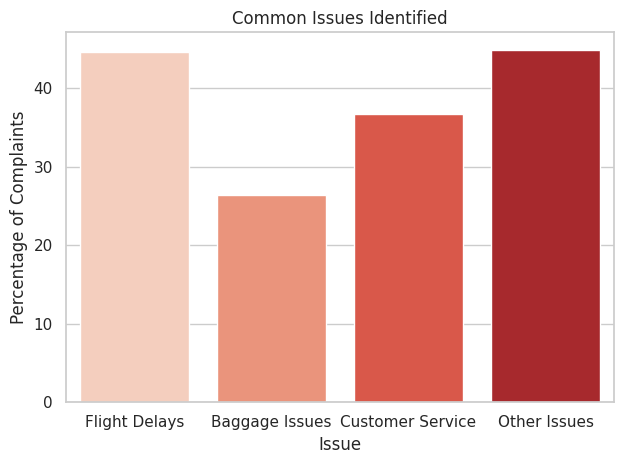

In [64]:
# COMMON ISSUES IDENTIFIED
themes = {
    "Flight Delays": ["delay", "delayed", "late", "departure", "schedule"],
    "Baggage Issues": ["baggage", "luggage", "lost", "missing", "damaged", "not received"],
    "Customer Service": ["customer service", "support", "response", "rude", "agent", "help"],
    "Other Issues": ["boarding", "cancellation", "refund", "voucher", "meal", "catering"]
}

# Lowercase all reviews
# Changed 'reviews' to 'review_text'
df["review_lower"] = df["review_text"].str.lower()

# Count issues
for theme, keywords in themes.items():
    df[theme] = df["review_lower"].apply(lambda text: any(k in text for k in keywords))

issue_counts = df[list(themes.keys())].sum()
issue_percent = (issue_counts / len(df) * 100).round(1)

common_issues_df = pd.DataFrame({
    "Issue": issue_counts.index,
    "Mentions": issue_counts.values,
    "Percentage": issue_percent.values
})

import os

# Create the 'output' directory if it doesn't exist
os.makedirs("output", exist_ok=True)

# Now you can save the DataFrame to CSV
common_issues_df.to_csv("output/common_issues.csv", index=False)

# Visualization
sns.barplot(data=common_issues_df, x="Issue", y="Percentage", palette="Reds")
plt.title("Common Issues Identified")
plt.ylabel("Percentage of Complaints")
plt.tight_layout()
plt.savefig("output/common_issues.png")
plt.show()

In [65]:
# CUSTOMER SERVICE RESPONSE TIME - Regex based estimates
import re

# Search for time references
def extract_wait_time(text):
    matches = re.findall(r'(\d+)\s?(hours?|days?)', text)
    return matches[0][0] + " " + matches[0][1] if matches else None

df["response_time_ref"] = df["review_lower"].apply(extract_wait_time)
df["mentions_support"] = df["review_lower"].apply(lambda x: "support" in x or "response" in x or "customer service" in x)

# Most common time expressions
response_time_summary = df["response_time_ref"].value_counts().head(10)
response_time_summary.to_csv("output/customer_service_times.csv")
print(response_time_summary)


response_time_ref
2 hours     36
5 hours     28
3 hours     25
1 hour      23
24 hours    18
12 hours    13
2 days      12
4 hours     11
5 hour       8
3 days       8
Name: count, dtype: int64


<ipython-input-66-39740e0617bb>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




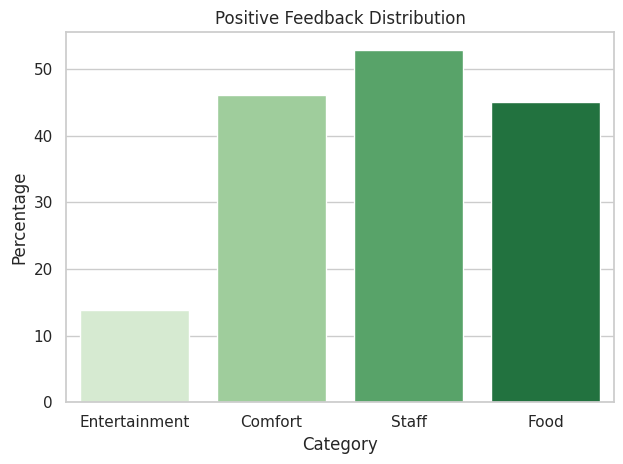

In [66]:
# POSITIVE FEEDBACK ANALYSIS
positive_keywords = {
    "Entertainment": ["entertainment", "movies", "tv", "screen"],
    "Comfort": ["seat", "comfortable", "legroom"],
    "Staff": ["staff", "crew", "friendly", "attentive"],
    "Food": ["meal", "food", "catering", "snack"]
}

positive_feedback = {}
for category, keywords in positive_keywords.items():
    positive_feedback[category] = df["review_lower"].apply(lambda x: any(k in x for k in keywords)).sum()

positive_df = pd.DataFrame.from_dict(positive_feedback, orient='index', columns=['Mentions'])
positive_df["Percentage"] = (positive_df["Mentions"] / len(df) * 100).round(1)
positive_df = positive_df.reset_index().rename(columns={"index": "Category"})

positive_df.to_csv("output/positive_feedback.csv", index=False)

# Visualization
sns.barplot(data=positive_df, x="Category", y="Percentage", palette="Greens")
plt.title("Positive Feedback Distribution")
plt.tight_layout()
plt.savefig("output/positive_feedback.png")
plt.show()


In [67]:
# STRATEGIC RECOMMENDATIONS BASED ON COMMON ISSUES
recommendations = {
    "Flight Delays": "Optimize scheduling and improve communication during disruptions.",
    "Baggage Issues": "Invest in tracking systems and automate luggage handling.",
    "Customer Service": "Reduce response time and train staff for high-empathy service.",
    "Other Issues": "Enhance refund systems and update in-flight meal planning."
}

recommendation_df = pd.DataFrame(list(recommendations.items()), columns=["Issue", "Recommendation"])
recommendation_df.to_csv("output/strategic_recommendations.csv", index=False)
print(recommendation_df)


              Issue                                     Recommendation
0     Flight Delays  Optimize scheduling and improve communication ...
1    Baggage Issues  Invest in tracking systems and automate luggag...
2  Customer Service  Reduce response time and train staff for high-...
3      Other Issues  Enhance refund systems and update in-flight me...


<ipython-input-68-a51fd76c29ff>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




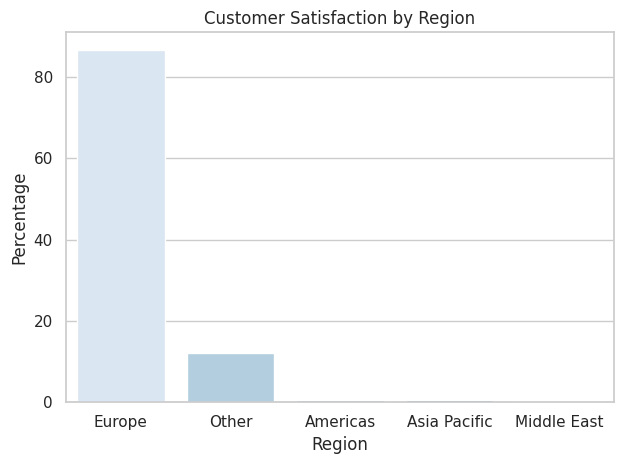

In [68]:
# REGIONAL PERFORMANCE ANALYSIS (Assumes `route` column exists in df)
import geopandas as gpd

def extract_region(text):
    if pd.isna(text): return "Unknown"
    text = text.lower()
    if "london" in text or "paris" in text or "frankfurt" in text: return "Europe"
    elif "new york" in text or "chicago" in text or "usa" in text: return "Americas"
    elif "dubai" in text or "doha" in text: return "Middle East"
    elif "tokyo" in text or "bangkok" in text or "singapore" in text: return "Asia Pacific"
    else: return "Other"

df["Region"] = df["route"].apply(extract_region)

region_summary = df["Region"].value_counts().reset_index()
region_summary.columns = ["Region", "Mentions"]
region_summary["Percentage"] = (region_summary["Mentions"] / len(df) * 100).round(1)
region_summary.to_csv("output/region_performance.csv", index=False)

# Visualization
sns.barplot(data=region_summary, x="Region", y="Percentage", palette="Blues")
plt.title("Customer Satisfaction by Region")
plt.tight_layout()
plt.savefig("output/region_performance.png")
plt.show()
